In [3]:
#
# TD 3 "Sciences du Climat" - Question 3
# équilibre : calcul direct
#
import numpy as np

#les paramètres
swA=67
swS=168
LH=78
SH=24
eta=0.9
sigma=5.67e-8

#système d'equation linéaire en xa = sigma Ta^4 et xs = sigma Ts^4
#  0 == Ca dTa/dt = swa + ...
#  0 == Cs dTs/dt = sws + ...

#On résoud l'équation matricielle a.x = b

#############  à compléter   #########
a=np.array([[eta, -2*eta], [-1, 1.25*eta]])
b=np.array([-(swA+LH+SH), -(swS-LH-SH)])
######################################

x = np.linalg.solve(a, b)

print( "sigmaT4 = ",x )
print( "T = ",pow(x/sigma,0.25) )
print( "T celcius = ",pow(x/sigma,0.25) - 273.15 )

sigmaT4 =  [392.28571429 290.03174603]
T =  [288.40637673 267.43338387]
T celcius =  [15.25637673 -5.71661613]


TA, TS =  267.42385357307774 , 288.3914251580937


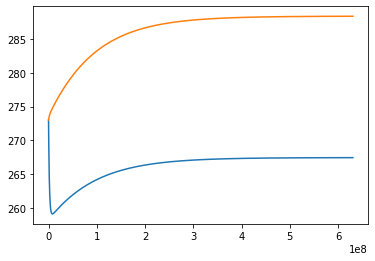

In [4]:
#
# TD 3 "Sciences du Climat" - Question 4
# équilibre : intégration temporelle
#
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#les paramètres
swA=67
swS=168
LH=78
SH=24
eta=0.9
sigma=5.67e-8

#les capacités calorifiques
cA=13e+6
cS=210e+6

# le système d'équations différentielles
def f(t,y):
    # on renomme les 2 variables
    TA = y[0]
    TS = y[1]
    sigmaTA4 = sigma*TA**4
    sigmaTS4 = sigma*TS**4
    # on en déduit les équations
#############  à compléter   #########
    dTAdt = (swA + LH + SH + eta*sigmaTS4 - 2*eta*sigmaTA4)/cA
    dTSdt = (swS - LH - SH - sigmaTS4 + 1.25*eta*sigmaTA4)/cS
######################################
    return [dTAdt, dTSdt]

# la condition initiale: par exemple 273 K
y0 = [273,273]
# la durée de l'intégration en secondes. Ici 20 ans.
tfinal = (60*60*24)*365*20

sol = solve_ivp(f, [0, tfinal], y0, rtol = 1e-7)
yfinal = sol.y[:,-1]
TAfinal = yfinal[0]
TSfinal = yfinal[1]
print( "TA, TS = ",TAfinal, ",", TSfinal )

plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.show()

# A abcissa está em segundos

In [5]:
#
# TD 3 "Sciences du Climat" - Question 5a
# équilibre : calcul direct
#
import numpy as np

#les paramètres
swA=67
swS=168
LH=78
SH=24
eta=0.9 + 0.03*(np.sqrt(2)-1)  #MUDOU!!!!
sigma=5.67e-8

#système d'equation linéaire en xa = sigma Ta^4 et xs = sigma Ts^4
#  0 == Ca dTa/dt = swa + ...
#  0 == Cs dTs/dt = sws + ...

#On résoud l'équation matricielle a.x = b

#############  à compléter   #########
a=np.array([[eta, -2*eta], [-1, 1.25*eta]])
b=np.array([-(swA+LH+SH), -(swS-LH-SH)])
######################################

x = np.linalg.solve(a, b)

print( "sigmaT4 = ",x )
print( "T = ",pow(x/sigma,0.25) )
print( "T celcius = ",pow(x/sigma,0.25) - 273.15 )

sigmaT4 =  [399.37543085 292.29792417]
T =  [289.70071781 267.9542613 ]
T celcius =  [16.55071781 -5.1957387 ]


TA, TS =  267.5967027521901 , 289.70869104454613


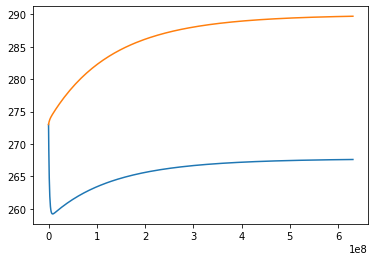

In [1]:
#
# TD 3 "Sciences du Climat" - Questions 5 et 6
# équilibre : intégration temporelle
#

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#les paramètres
swA=67
swS=168
LH=78
SH=24
eta=0.9
sigma=5.67e-8

#les capacités calorifiques
cA=13e+6
cS=210e+6

#les nuages (Question 6)
DeltaHcld = 0
DeltaLcld = 0

co2 = 560

############ on selection la question ICI #######
question = '6'
#################################################

def ew(T):
    return 6.112*np.exp(17.62*(T-273.15)/(243.12+T-273.15))

# le système d'équations différentielles
def f(t,y):
    # on renomme les 2 variables
    TA = y[0]
    TS = y[1]
    swS = 168
    co2 = 560
    
    if question=='5a':       # on modifie le CO2, sans rétroaction
#############  à compléter   #########
        eta =0.9 + 0.03*(np.sqrt(2) - 1)
######################################
    elif question=='5b':     # on modifie le CO2 et la vapeur d'eau
        #############  à compléter   #########
        eta = 0.9 + 0.03*(np.sqrt(2) - 1) + 0.05*(ew(TS)/ew(288.4) - 1)
######################################
    elif question=='5c':     # on modifie le CO2, la vapeur d'eau et l'albédo de surface
#############  à compléter   #########
        eta = 0.9 + 0.03*(np.sqrt(co2/280)-1) + 0.05*(ew(TS)/ew(288) - 1)
        alphaS = 30/198 - 0.0015 * (TS-288)
        swS = 198 * (1-alphaS)
######################################
    elif question=='6':
        co2 = 2*280
        DeltaLcld = 0.1  # à modifier = 0 ou 0.1
        DeltaHcld = 0.   # à modifier = 0 ou 0.1
        eta = 0.9+0.03*(np.sqrt(co2/280)-1)+0.05*(ew(TS)/ew(288) - 1)+0.1*DeltaHcld + 0.1*DeltaLcld
        alphaA = 77.0/342 + 0.02*DeltaHcld + 0.125*DeltaLcld
        swS = (168.0/198)*342*(1-67.0/342-alphaA)
    else:
        eta = 0.9
    
    sigmaTA4 = sigma*TA**4
    sigmaTS4 = sigma*TS**4
    # on en déduit les équations
    #############  à compléter .... copier-coller de la question 3  #########
    dTAdt = (swA + LH + SH + eta*sigmaTS4 - 2*eta*sigmaTA4)/cA
    dTSdt = (swS - LH - SH - sigmaTS4 + 1.25*eta*sigmaTA4)/cS
    ######################################
    return [dTAdt, dTSdt]

# la condition initiale: par exemple 273 K
y0 = [273,273]
# la durée de l'intégration en secondes. Ici 20 ans.
tfinal = (60*60*24)*365*20

sol = solve_ivp(f, [0, tfinal], y0, rtol = 1e-7)
yfinal = sol.y[:,-1]
TAfinal = yfinal[0]
TSfinal = yfinal[1]
print( "TA, TS = ",TAfinal, ",", TSfinal )

plt.plot(sol.t,sol.y[0])
plt.plot(sol.t,sol.y[1])
plt.show()